# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549333137.5


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 80
max_edges = 20000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 20000 edges out of 229338 available (8.72% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,4102.000000,4102,4102,4102,4057,4061,0.0,401,3844,3797,3797,2852,1425,568,125,9,0.0,0.0,0.0,4063,4063,4061,4102.0,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4.102000e+03,4.102000e+03,4102.000000,4102.000000
unique,NaN,4020,4102,2948,9,427,NaN,334,1,1,28,174,301,165,48,5,NaN,NaN,NaN,4063,4063,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8535931015/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,5 de fevereiro de 2014,Livros,Livros,Literatura e Ficção,Filosofia,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8525431494,978-8521318378,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,39,3305,355,NaN,5,3844,3797,591,325,138,41,14,3,NaN,NaN,NaN,1,1,3386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2860.202340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.115580,35716.256500,378.541697,16.646056,4.450203,15.334128,22.322795,2.217189,442.921269,2.101962e+09,3.745309e-03,8.495368,0.002112
std,2114.015301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,190.122651,56611.803539,261.572101,37.048344,0.530242,2.482813,2.501593,1.289773,202.962448,1.228866e+09,1.488494e-02,22.295140,0.006668
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.600000,8.600000,0.200000,9.100000,2.291770e+05,5.860282e-08,1.000000,0.000000
25%,1195.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.990000,5789.250000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,1.028654e+09,7.887278e-06,1.000000,0.000000
50%,2617.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.930000,18060.500000,320.000000,10.000000,4.453925,15.400000,22.800000,2.000000,444.980143,2.078429e+09,3.873898e-05,2.000000,0.000305
75%,3958.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,66.867500,37204.750000,464.000000,16.618748,4.800000,16.000000,23.400000,2.800000,544.000000,3.142654e+09,2.491863e-04,6.000000,0.001304


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.012592,19,0.005869
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.053493,62,0.004307
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,16.618748,4.453925,14.4,20.8,0.8,200.0,1260550007,0.034533,59,0.007464
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.011867,18,0.003615
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.074789,88,0.012306
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.050002,43,0.009802
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,16.618748,4.453925,13.7,21.5,0.8,159.0,744636978,0.008733,9,0.000462
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.004539,10,0.008160
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,16.618748,4.453925,13.6,20.3,2.3,522.0,1246026773,0.019511,23,0.004769
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price


Test percentage:  0.199902486592
Train features shape:  (3282, 4113)
Train target shape:  (3282,)
Test features shape:  (820, 4113)
Test target shape:  (820,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 91.93911639244362
Median parice; R$ 39.9


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.3600812250648372
RF relative abs std:  0.033799104967858914
Baseline (average) relative mean:  1.7292484924647749
Baseline (average) relative std:  0.04456223047914325
Baseline (median) relative mean:  0.550434406370311
Baseline (median) relative std:  0.0339671242160424
=== Absolute
RF abs mean:  32.75623193840815
RF abs std:  6.909928892334097
Baseline (average) mean:  87.86481616641251
Baseline (average) std:  11.350800438771282
Baseline (median) mean:  64.81510384387278
Baseline (median) std:  12.619127994927847


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,eigenvector_centrality,30.286795,1.095652,0.036176
1,coverType_Capa comum,12.812071,1.367522,0.106737
2,pages,9.469643,1.725720,0.182237
3,betweenness_centrality,5.756314,0.599474,0.104142
4,publisher_Cengage Learning,4.097187,1.330628,0.324766
5,width,3.930845,0.342205,0.087056
6,coverType_Capa dura,3.871080,1.938520,0.500770
7,publisher_McGraw-Hill Science/Engineering/Math,3.367758,1.130718,0.335748
8,height,3.032764,0.495039,0.163230
9,degree,2.823634,0.598716,0.212037


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [329, 329, 328, 328, 328, 328, 328, 328, 328, 328]
X shape:  (3282, 4113)
y shape:  (3282,)


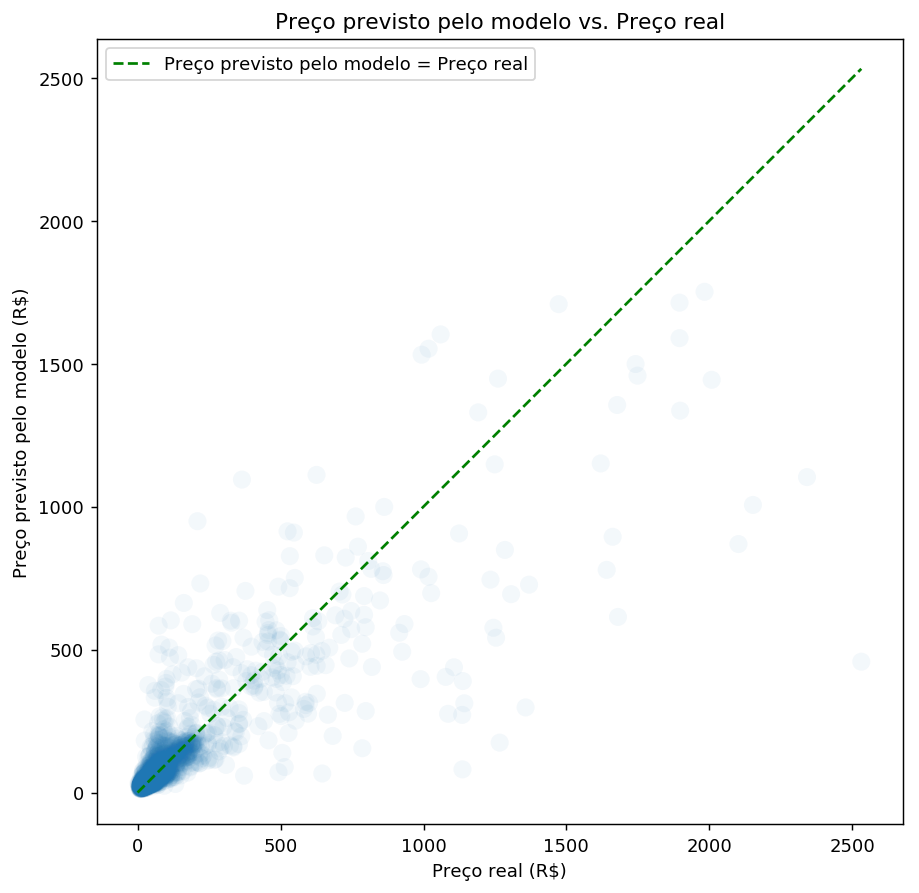

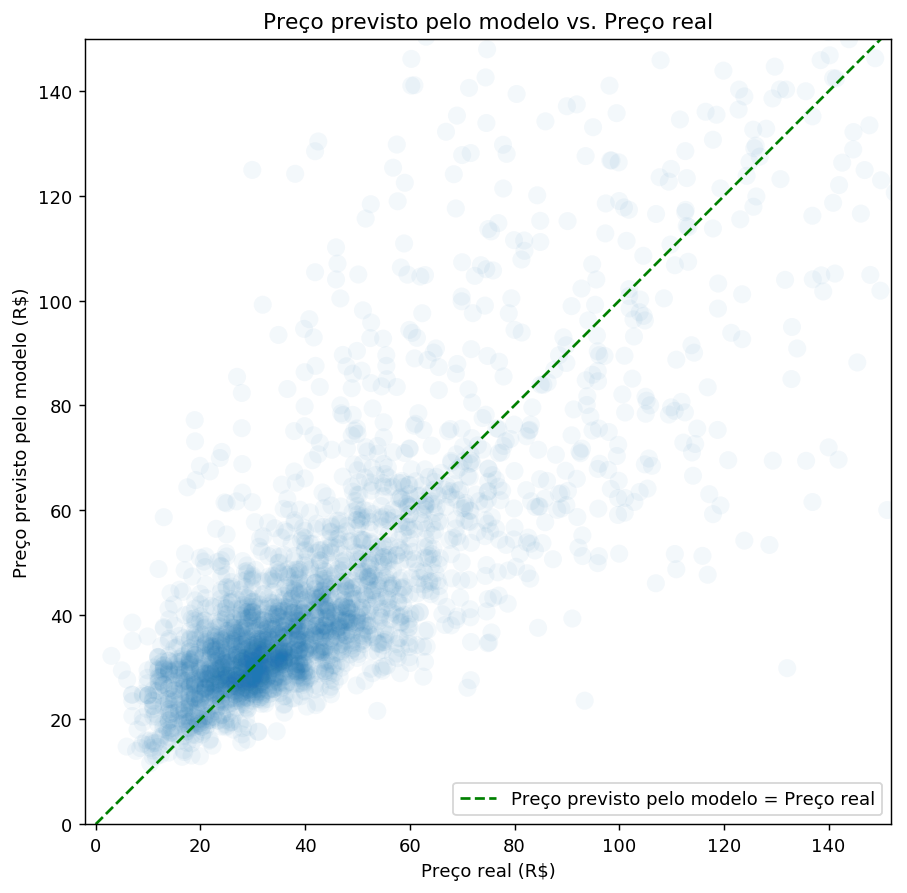

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 32.75)
('Std prediction error: R$', 99.58)
('Mean absolute error using average: R$', 87.86)
('Std prediction error using average: R$', 177.03)
('Mean absolute error using median: R$', 64.81)
('Std prediction error using median: R$', 193.83)
== Relative
('Mean relative absolute prediction error: ', 0.36)
('Std relative prediction error: ', 0.57)
('Mean relative absolute error using average: ', 1.73)
('Std relative prediction error using average: ', 1.69)
('Mean absolute error using median: R$', 0.55)
('Std prediction error using median: R$', 0.59)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 13.0, 0.0210727178754, 0.0006180...",2073.532375,2439.130884,2491.17,0.984236,0.963676,0.819232,457.537625,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,36626.500628,345.000000,16.618748,4.453925,16.000000,23.100000,2.500000,444.980143,0.021073,13,0.000618
1.731114e+09,"[1731113829.0, 13.0, 0.025706204142, 0.0008161...",1238.081625,2249.260884,2301.30,0.982957,0.960730,0.528824,1103.118375,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,36626.500628,688.000000,16.618748,4.453925,20.300000,25.400000,3.200000,444.980143,0.025706,13,0.000816
1.144179e+09,"[1144179495.0, 4.0, 0.00338631390905, 0.000844...",1232.557875,2009.600884,2061.64,0.981014,0.956252,0.586502,868.982125,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,36626.500628,432.000000,16.618748,4.453925,16.800000,24.100000,3.300000,921.000000,0.003386,4,0.000844
7.945218e+08,"[794521798.0, 2.0, 0.00134049119642, 6.2089854...",1146.361500,2060.230884,2112.27,0.981461,0.957281,0.532654,1005.808500,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,36626.500628,768.000000,16.618748,4.453925,18.500000,23.900000,3.300000,444.980143,0.001340,2,0.000062
2.611927e+09,"[2611927292.0, 1.0, 0.00083333710589, 0.0, 366...",1091.863625,1174.420884,1226.46,0.968492,0.927399,0.862206,174.496375,1266.36,1937,The Physics of Low-dimensional Semiconductors:...,https://www.amazon.com.br/dp/0521481481/,Dr John H. Davies (Autor),Capa dura,Cambridge University Press,NaN,13 de dezembro de 1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0521481481,978-0521481489,Inglês,1,1266.36,36626.500628,458.000000,16.618748,4.453925,17.700000,25.300000,2.500000,444.980143,0.000833,1,0.000000
1.859584e+09,"[1859584463.0, 2.0, 0.00478533595471, 0.000672...",1066.002875,1588.150884,1640.19,0.976251,0.945277,0.634492,614.087125,1680.09,1918,Electric Machinery and Power System Fundamentals,https://www.amazon.com.br/dp/0072291354/,Stephen J. Chapman (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0072291354,978-0072291353,Inglês,1,1680.09,36626.500628,696.000000,16.618748,4.453925,19.000000,23.400000,3.300000,444.980143,0.004785,2,0.000672
1.993779e+09,"[1993779221.0, 25.0, 0.0320806832688, 0.002645...",1059.438000,1265.060884,1317.10,0.970597,0.932248,0.780721,297.562000,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,36626.500628,383.778694,16.618748,4.453925,15.397945,22.381195,2.237916,444.980143,0.032081,25,0.002645
1.

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.272729e+08,"[227272911.0, 1.0, 1.52513874795e-05, 0.0, 145...",29.151000,88.949116,36.91,12.344482,29.748868,9.749498,32.141000,2.99,5170,Caçadores de Obras-Primas,https://www.amazon.com.br/dp/8532526144/,Robert M. Edsel (Autor),Capa comum,Rocco,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8532526144,978-8532526144,Português,1,2.99,1451.000000,368.000000,9.000000,4.200000,15.800000,22.800000,2.000000,558.000000,0.000015,1,0.000000
4.006253e+09,"[4006253053.0, 62.0, 0.00151122552442, 0.02016...",231.511250,68.039116,16.00,0.669456,2.846825,9.686663,255.411250,23.90,130,50 Ideias de Matemática que Você Precisa Conhecer,https://www.amazon.com.br/dp/8542208862/,Tony Crilly (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,23.90,36626.500628,383.778694,16.618748,4.453925,15.397945,22.381195,2.237916,444.980143,0.001511,62,0.020167
1.509883e+09,"[1509882571.0, 1.0, 0.0017573539151, 0.0, 8352...",338.596125,54.529116,2.49,0.066560,1.457608,9.050952,376.006125,37.41,1818,Quantum Computing for Babies,https://www.amazon.com.br/dp/1492671185/,"Chris Ferrie (Autor),",Livro cartonado,Sourcebooks Jabberwocky,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Infantil e Infantojuvenil,Ciência e Natureza,Física,NaN,NaN,NaN,NaN,NaN,1492671185,978-1492671183,Inglês,1,37.41,83523.000000,24.000000,16.618748,4.453925,19.800000,20.300000,1.300000,354.000000,0.001757,1,0.000000
2.644459e+09,"[2644458574.0, 16.0, 0.0390812154494, 0.001072...",509.794500,18.339116,33.70,0.457880,0.249173,6.926556,583.394500,73.60,2169,100 Instructive Calculus-Based Physics Example...,https://www.amazon.com.br/dp/1941691137/,Chris McMullen (Autor),NaN,Zishka Publishing,NaN,17 de maio de 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941691137,978-1941691137,Inglês,1,73.60,36626.500628,383.778694,16.618748,4.453925,21.600000,27.900000,2.300000,980.000000,0.039081,16,0.001072
2.381738e+09,"[2381737828.0, 34.0, 0.00386472487798, 0.02039...",156.639250,66.949116,14.91,0.596639,2.679036,6.268077,181.629250,24.99,207,Meus Últimos Anos. Os Escritos da Maturidade d...,https://www.amazon.com.br/dp/8520935419/,Albert Einstein (Autor),Capa dura,Nova Fronteira,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520935419,978-8520935415,Português,1,24.99,4978.000000,272.000000,3.000000,5.000000,15.800000,23.600000,2.000000,540.000000,0.003865,34,0.020393
3.593346e+09,"[3593346089.0, 1.0, 0.00158560771024, 0.0, 236...",409.739625,18.569116,33.47,0.456181,0.253089,5.584566,483.109625,73.37,1765,The Little Book of Black Holes,https://www.amazon.com.br/dp/0691163723/,"Steven S. Gubser (Autor),",Capa dura,Princeton University Press,NaN,12 de setembro de 2017,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0691163723,978-0691163727,Inglês,1,73.37,236828.000000,200.000000,16.618748,4.453925,15.200000,22.900000,1.300000,458.000000,0.001586,1,0.000000
1.487078e+08,"[148707819.0, 11.0, 0.0223031069305, 0.0006559...",433.837875,8.499116,43.54,0.521812,0.101859,5.199399,517.277875,83.44,2252,Maker of Patterns – An Autobiography Through L...,https://www.amazon.com.br/dp/0871403862/,Freeman Dyson (Autor),Capa dura,Liveright,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0871403862,978-0871403865,Inglês,1,83.44,198305.000000,416.000000,1.000000,5.000000,16.800000,24.400000,3.600000,739.000000,0.022303,11,0.000656
3.111996e+09,"[311199565

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.769218e+08,"[276921840.0, 1.0, 9.59213546709e-07, 0.0, 274...",0.011875,41.819116,10.22,0.203911,0.834380,0.000237,50.131875,50.12,2809,Economia e Sociedade na Grécia Antiga,https://www.amazon.com.br/dp/8578276809/,M. I. Finley (Autor),Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8578276809,978-8578276805,Português,1,50.12,27449.0,400.0,1.000000,4.000000,13.6,20.6,1.8,522.0,9.592135e-07,1,0.000000
7.085439e+08,"[708543887.0, 5.0, 0.000240253652379, 0.000514...",0.013750,64.639116,12.60,0.461538,2.367733,0.000504,27.286250,27.30,4042,Homens Imprudentemente Poéticos,https://www.amazon.com.br/dp/8525063282/,Mãe Valter Hugo (Autor),Capa comum,Biblioteca Azul,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8525063282,978-8525063281,Português,1,27.30,5694.0,192.0,18.000000,4.700000,15.0,21.8,1.2,299.0,2.402537e-04,5,0.000515
3.335959e+09,"[3335959231.0, 1.0, 3.8738976345e-05, 0.0, 273...",0.015375,61.809116,9.77,0.324262,2.051414,0.000510,30.145375,30.13,9026,A Rosa do Povo,https://www.amazon.com.br/dp/8535920277/,Carlos Drummond Andrade (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535920277,978-8535920277,Português,1,30.13,27369.0,200.0,2.000000,4.400000,13.8,21.0,1.2,259.0,3.873898e-05,1,0.000000
9.484112e+08,"[948411235.0, 3.0, 7.35045752287e-05, 0.002935...",0.022500,53.039116,1.00,0.025707,1.363473,0.000578,38.877500,38.90,969,O que É Filosofia?,https://www.amazon.com.br/dp/8567394961/,"José Ortega y Gasset (Autor),",Capa comum,Vide,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8567394961,978-8567394961,Português,1,38.90,11060.0,291.0,7.000000,4.400000,15.6,22.8,1.6,522.0,7.350458e-05,3,0.002935
2.784380e+09,"[2784379795.0, 1.0, 4.59716946224e-05, 0.0, 21...",0.025125,61.619116,9.58,0.315963,2.032293,0.000829,30.294875,30.32,5490,O Valor do Amanhã,https://www.amazon.com.br/dp/8535920412/,Eduardo Giannetti (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535920412,978-8535920413,Português,1,30.32,21623.0,208.0,16.000000,3.800000,16.0,22.9,1.5,299.0,4.597169e-05,1,0.000000
1.705417e+09,"[1705417104.0, 43.0, 0.00290024537054, 0.01915...",0.026625,66.279116,14.24,0.554949,2.582974,0.001038,25.686625,25.66,125,Sete Breves Lições de Física,https://www.amazon.com.br/dp/8539007096/,Carlo Rovelli (Autor),Capa comum,Objetiva,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8539007096,978-8539007097,Português,1,25.66,8208.0,96.0,39.000000,4.200000,14.0,21.2,1.0,159.0,2.900245e-03,43,0.019157
7.623907e+08,"[762390653.0, 6.0, 0.000223549061409, 0.000447...",0.030250,61.799116,9.76,0.323822,2.050402,0.001004,30.109750,30.14,4225,A Tentação Do Impossível. Victor Hugo E Os Mis...,https://www.amazon.com.br/dp/8579621216/,Mario Vargas Llosa (Autor),Capa comum,Alfaguara,NaN,NaN,Livros,Livros,Literatura e Ficção,Ficção,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8579621216,978-8579621215,Português,1,30.14,11940.0,176.0,5.000000,4.000000,15.0,23.2,1.6,308.0,2.235491e-04,6,0.000447
2.947771e+09,"[2947770739.0, 1.0, 2.11487265933e-05, 0.0, 14...",0.033500,65.039116,13.00,0.483271,2.417811,0.001245,26.866500,26.90,4805,O Livro do Cemitério,https://www.amazon.com.br/dp/8579800129/,"Neil Gaiman (Autor),",Capa comum,Rocco,NaN,NaN,Livros,Livros,Jove

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.769218e+08,"[276921840.0, 1.0, 9.59213546709e-07, 0.0, 274...",0.011875,41.819116,10.22,0.203911,0.834380,0.000237,50.131875,50.12,2809,Economia e Sociedade na Grécia Antiga,https://www.amazon.com.br/dp/8578276809/,M. I. Finley (Autor),Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8578276809,978-8578276805,Português,1,50.12,27449.0,400.0,1.000000,4.000000,13.6,20.6,1.8,522.0,9.592135e-07,1,0.000000
7.085439e+08,"[708543887.0, 5.0, 0.000240253652379, 0.000514...",0.013750,64.639116,12.60,0.461538,2.367733,0.000504,27.286250,27.30,4042,Homens Imprudentemente Poéticos,https://www.amazon.com.br/dp/8525063282/,Mãe Valter Hugo (Autor),Capa comum,Biblioteca Azul,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8525063282,978-8525063281,Português,1,27.30,5694.0,192.0,18.000000,4.700000,15.0,21.8,1.2,299.0,2.402537e-04,5,0.000515
3.335959e+09,"[3335959231.0, 1.0, 3.8738976345e-05, 0.0, 273...",0.015375,61.809116,9.77,0.324262,2.051414,0.000510,30.145375,30.13,9026,A Rosa do Povo,https://www.amazon.com.br/dp/8535920277/,Carlos Drummond Andrade (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535920277,978-8535920277,Português,1,30.13,27369.0,200.0,2.000000,4.400000,13.8,21.0,1.2,259.0,3.873898e-05,1,0.000000
9.484112e+08,"[948411235.0, 3.0, 7.35045752287e-05, 0.002935...",0.022500,53.039116,1.00,0.025707,1.363473,0.000578,38.877500,38.90,969,O que É Filosofia?,https://www.amazon.com.br/dp/8567394961/,"José Ortega y Gasset (Autor),",Capa comum,Vide,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8567394961,978-8567394961,Português,1,38.90,11060.0,291.0,7.000000,4.400000,15.6,22.8,1.6,522.0,7.350458e-05,3,0.002935
2.784380e+09,"[2784379795.0, 1.0, 4.59716946224e-05, 0.0, 21...",0.025125,61.619116,9.58,0.315963,2.032293,0.000829,30.294875,30.32,5490,O Valor do Amanhã,https://www.amazon.com.br/dp/8535920412/,Eduardo Giannetti (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535920412,978-8535920413,Português,1,30.32,21623.0,208.0,16.000000,3.800000,16.0,22.9,1.5,299.0,4.597169e-05,1,0.000000
1.705417e+09,"[1705417104.0, 43.0, 0.00290024537054, 0.01915...",0.026625,66.279116,14.24,0.554949,2.582974,0.001038,25.686625,25.66,125,Sete Breves Lições de Física,https://www.amazon.com.br/dp/8539007096/,Carlo Rovelli (Autor),Capa comum,Objetiva,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8539007096,978-8539007097,Português,1,25.66,8208.0,96.0,39.000000,4.200000,14.0,21.2,1.0,159.0,2.900245e-03,43,0.019157
7.623907e+08,"[762390653.0, 6.0, 0.000223549061409, 0.000447...",0.030250,61.799116,9.76,0.323822,2.050402,0.001004,30.109750,30.14,4225,A Tentação Do Impossível. Victor Hugo E Os Mis...,https://www.amazon.com.br/dp/8579621216/,Mario Vargas Llosa (Autor),Capa comum,Alfaguara,NaN,NaN,Livros,Livros,Literatura e Ficção,Ficção,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8579621216,978-8579621215,Português,1,30.14,11940.0,176.0,5.000000,4.000000,15.0,23.2,1.6,308.0,2.235491e-04,6,0.000447
2.947771e+09,"[2947770739.0, 1.0, 2.11487265933e-05, 0.0, 14...",0.033500,65.039116,13.00,0.483271,2.417811,0.001245,26.866500,26.90,4805,O Livro do Cemitério,https://www.amazon.com.br/dp/8579800129/,"Neil Gaiman (Autor),",Capa comum,Rocco,NaN,NaN,Livros,Livros,Jove

### Relative errors distribution

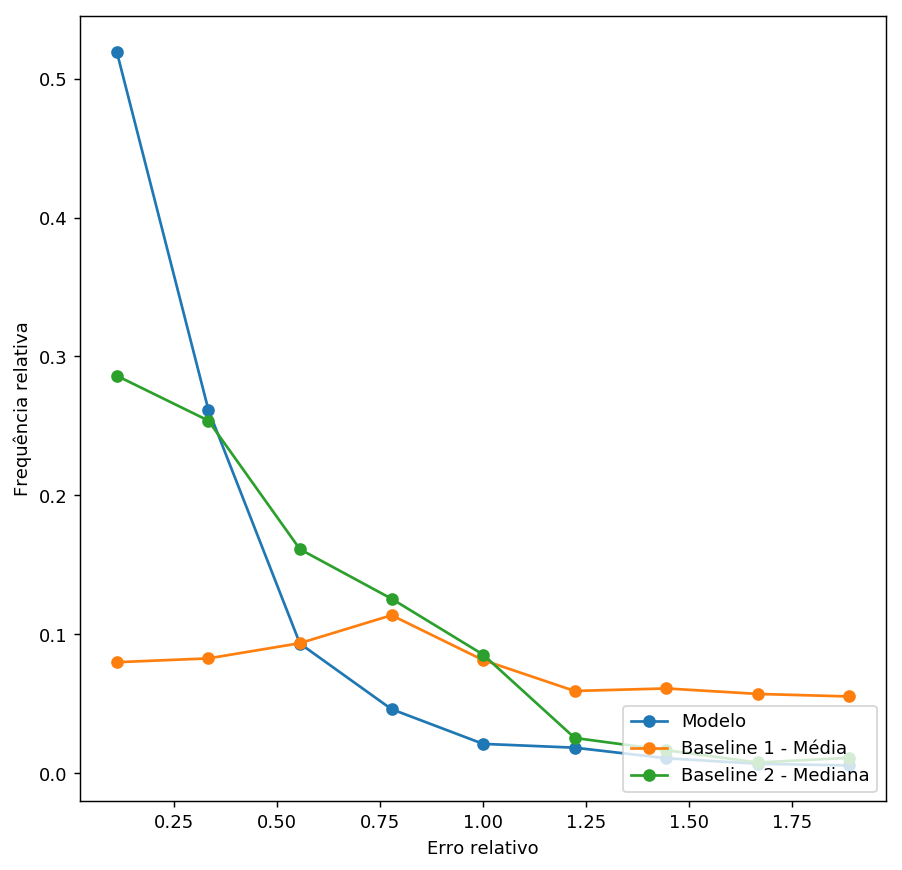

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

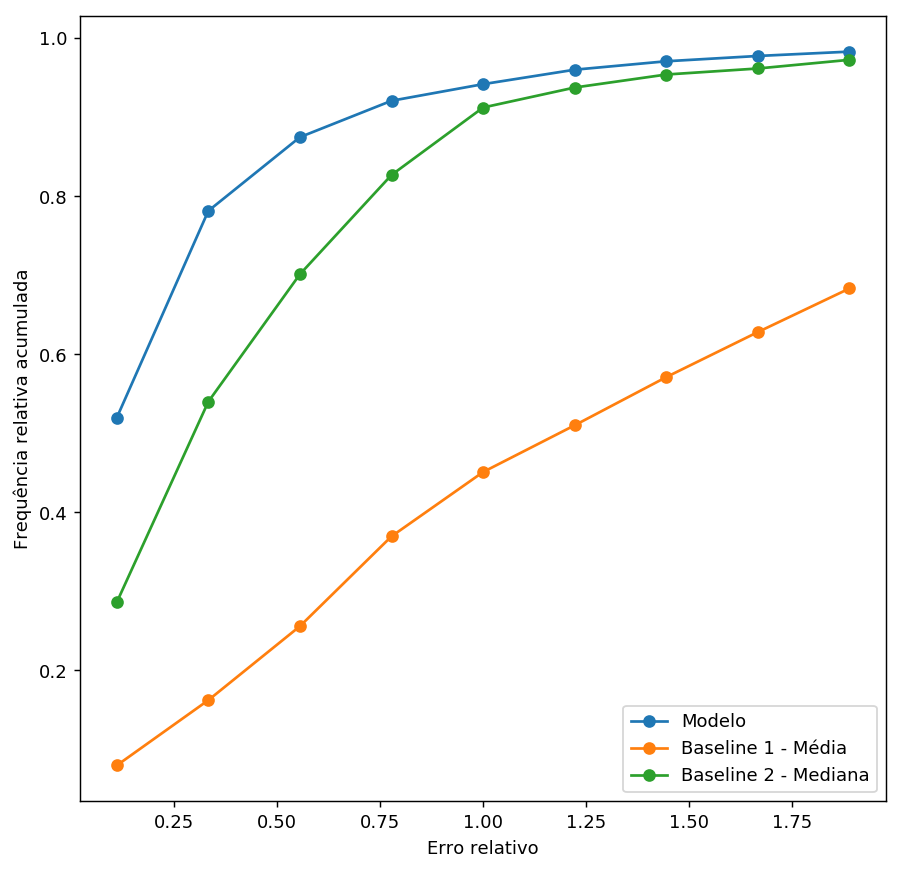

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,0.0,0.0,0.0,0.0,3282.0,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3282.000000,3282.000000
mean,32.752615,87.860166,64.809171,0.550421,1.729242,0.360077,87.078057,91.939116,2874.532602,NaN,NaN,NaN,NaN,1.0,91.939116,35548.091601,377.443472,16.806693,4.446878,15.327121,22.320747,2.213294,440.504725,3.684468e-03,8.525289,0.002137
std,99.592040,177.061192,193.855135,0.592206,1.685406,0.570433,157.604894,197.667466,2118.396894,NaN,NaN,NaN,NaN,0.0,197.667466,56357.544975,255.465184,38.246650,0.532419,2.479449,2.513126,1.300067,202.571212,1.492790e-02,23.054739,0.006954
min,0.011875,0.039116,0.000000,0.000000,0.000426,0.000237,11.666125,2.990000,1.000000,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.800000,8.600000,0.200000,9.100000,5.860282e-08,1.000000,0.000000
25%,3.808281,41.949116,7.800000,0.194611,0.652170,0.096891,30.363281,27.990000,1218.250000,NaN,NaN,NaN,NaN,1.0,27.990000,5794.250000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,7.779502e-06,1.000000,0.000000
50%,8.865500,57.560000,15.100000,0.411374,1.304239,0.210675,39.211125,39.900000,2605.500000,NaN,NaN,NaN,NaN,1.0,39.900000,17686.500000,320.000000,11.000000,4.453925,15.400000,22.800000,2.000000,444.980143,3.954244e-05,2.000000,0.000304
75%,19.309625,68.939116,28.980000,0.742358,2.284713,0.401097,65.250812,65.512500,3981.500000,NaN,NaN,NaN,NaN,1.0,65.512500,36952.750000,464.000000,16.618748,4.800000,16.000000,23.200000,2.800000,544.000000,2.535681e-04,6.000000,0.001289
85%,34.883806,75.304616,65.000000,0.917688,2.999092,0.576930,117.577056,104.900000,4456.350000,NaN,NaN,NaN,NaN,1.0,104.900000,59026.000000,584.000000,16.618748,5.000000,17.000000,24.000000,3.200000,662.000000,7.061207e-04,12.000000,0.002521
90%,58.270362,81.039116,119.441000,1.005025,3.620056,0.770038,163.601687,159.341000,5688.500000,NaN,NaN,NaN,NaN,1.0,159.341000,78421.900000,675.900000,24.900000,5.000000,18.890000,25.100000,3.600000,739.000000,4.390245e-03,18.000000,0.004047
95%,136.273037,263.133384,315.172500,1.495310,4.749788,1.230112,361.822794,355.072500,7550.950000,NaN,NaN,NaN,NaN,1.0,355.072500,127922.700000,848.000000,50.000000,5.000000,20.800000,27.600000,4.400000,839.000000,2.437872e-02,34.000000,0.010471


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
298.017000198


<img src="files/image.png">